# Import Data

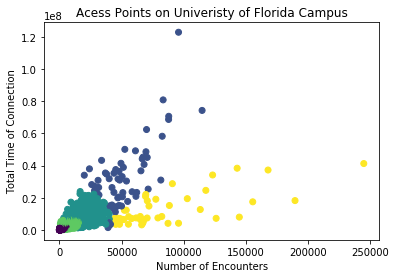

In [7]:
import csv
import matplotlib.pyplot as plt
import folium
from sklearn import mixture
from sklearn.cluster import KMeans
from sklearn.cluster import SpectralClustering
from folium import plugins
import re
import numpy as np 

#Import data from CSV files
with open('encounters_April.csv') as csvfile: 
    readCSV = csv.reader(csvfile, delimiter = ',')
    AP_namesE = []
    encounters = []
    for row in readCSV:
        name = row[0]
        AP_namesE.append(name)
        encounter = row[1]
        encounters.append(encounter)

with open('totaltime_April.csv') as csvfile: 
    readCSV = csv.reader(csvfile, delimiter = ',')
    AP_namesT = []
    time = []
    for row in readCSV:
        name = row[0]
        AP_namesT.append(name) 
        times = row[1]
        time.append(times)
        
with open('avgtime.csv') as csvfile: 
    readCSV = csv.reader(csvfile, delimiter = ',')
    AP_namesA = []
    avgtime = []
    for row in readCSV:
        name = row[0]
        AP_namesA.append(name) 
        times = row[1]
        avgtime.append(times)


del vectors[0]
AP = []
X = np.array(vectors)
kmeans = KMeans(n_clusters=4, random_state=0).fit_predict(X)
Gaus = mixture.GaussianMixture(n_components = 5).fit_predict(X)
for i in range(1704):
    if Gaus[i] == 3 or Gaus[i] == 2: 
        vec = vectors[i]
        for item in dictionary: 
            if dictionary[item] == vec:
                AP.append(item)
            else:
                continue
    else: 
        continue

#problem - non-deterministic, get a different answer every time. 
matrix2 = np.loadtxt(open("prefix_lat_lon_name_category.csv", "rb"), delimiter=",", skiprows=1, dtype=str)

location = []
name = [] 
count = 0 
AP_count = {}

for item in AP:
    prefix_no_num = re.search("^.*?(?=\d)",item)[0]
    prefix = re.search("^[^-]*", prefix_no_num)[0]
    for j in range(0, len(matrix2)):
        long_prefix = matrix2[j,0]
        #short_prefix = long_prefix[:3]
        if prefix == long_prefix: 
            latlong = [float(matrix2[j,1]), float(matrix2[j,2])]
            location.append(latlong)
            name.append(matrix2[j,3])
            if matrix2[j,3] in AP_count: 
                AP_count[matrix2[j,3]] = AP_count[matrix2[j,3]] + 1
            else: 
                AP_count[matrix2[j,3]] = 1
        else: 
            continue

with open('Clustering.csv', 'w') as csv_file:
    writer = csv.writer(csv_file)
    for key, value in AP_count.items():
        writer.writerow([key, value])


UF_COORDINATES = (29.64250,-82.347883)
map = folium.Map(location=UF_COORDINATES, zoom_start=15)
for i in range(len(location)):
    folium.CircleMarker(location[i], popup=name[i], radius = 5).add_to(map)
display(map)


plt.scatter(X[:,0], X[:,1], c = Gaus)
#plt.title('K-Means Clustering (number of clusters = 4)')
plt.title('Acess Points on Univeristy of Florida Campus')
plt.xlabel('Number of Encounters')
plt.ylabel('Total Time of Connection')
plt.show()


# Plot Encounters vs. Total Time of Connection

In [ ]:
vectors = []
x = []
y = []
dictionary = {}

#Total Time

i = 0 
for name in AP_namesE: 
    match = name
    vec = [] 
    vec.append(int(encounters[i]))
    x.append(int(encounters[i]))
    n = 0
    for names in AP_namesT: 
        if (names == match): 
            vec.append(int(time[n]))
            y.append(int(time[n]))
            n = n + 1
            break
        else: 
            n = n + 1
            continue
    i = i + 1 
    dictionary[name] = vec
    vectors.append(vec)

# Plot Envouncters vs Average Time of Connection

In [ ]:
vectors = []
x = []
y = []
dictionary = {}


#Average Time 

i = 0 
for name in AP_namesE: 
    match = name
    vec = [] 
    vec.append(int(encounters[i]))
    x.append(int(encounters[i]))
    n = 0
    for names in AP_namesA: 
        if (names == match): 
            vec.append(int(avgtime[n]))
            y.append(int(avgtime[n]))
            n = n + 1
            break
        else: 
            n = n + 1
            continue
    i = i + 1 
    vectors.append(vec)